In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [ ]:
#Reading data
data = pd.read_csv(r"/content/drive/MyDrive/AI, Data Science & Analytics/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


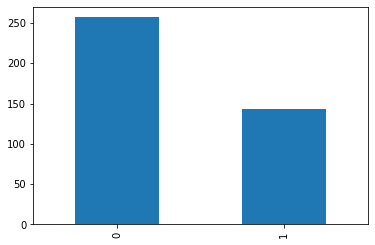

In [ ]:
data.Purchased.value_counts().plot(kind='bar')

In [ ]:
#Removing User ID, as it's an increamental value that doesn't add to our classification prediction
data.pop('User ID')
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:

#Replacing categorical values to numericals
data['Gender'].replace(['Male','Female'],[1,0],inplace=True)

data.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
#Using features: Gender, Age for prediction of Purchased label
feature_cols = ['Gender', 'Age']
X = data[feature_cols] # Features
Y = data.Purchased # Target variable

In [ ]:
#KNN
max_features = 3
kfold = model_selection.KFold(n_splits=10)
model = KNeighborsClassifier()
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy for KNeighborsClassifier:", round(results.mean()*100, 2)) #80

Accuracy for KNeighborsClassifier: 80.5


In [ ]:
#DECISION TREE
max_features = 3
kfold = model_selection.KFold(n_splits=10)
model = DecisionTreeClassifier(criterion='gini')
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy for DecisionTreeClassifier:", round(results.mean()*100, 2)) #78.25

Accuracy for DecisionTreeClassifier: 78.25


In [ ]:
#######################################################
'''
BAGGING
'''
######################################################

seed = 7
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy for BaggingClassifier:", round(results.mean()*100, 2)) #80%

Accuracy for BaggingClassifier: 80.25


In [ ]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 200
kfold = model_selection.KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy for RandomForestClassifier:", round(results.mean()*100, 2)) #80

Accuracy for RandomForestClassifier: 79.75


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = ExtraTreesClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy for ExtraTreesClassifier:", round(results.mean()*100, 2)) #78.49

Accuracy for ExtraTreesClassifier: 78.5


In [ ]:
#######################################################
'''
BOOSTING
'''
######################################################

from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy for AdaBoostClassifier:", round(results.mean()*100, 2)) #83

Accuracy for AdaBoostClassifier: 83.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy for GradientBoostingClassifier:", results.mean()) 

Accuracy for GradientBoostingClassifier: 0.8049999999999999


In [ ]:
#######################################################
'''
VOTING ENSEMBLE
'''
######################################################

# Voting Ensemble for Classification
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print("Accuracy for VotingClassifier:", results.mean()) #83.5

Accuracy for VotingClassifier: 0.835


In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBClassifier()

In [ ]:
import xgboost as xgb

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = xgb.XGBClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy for XGBoost:", results.mean()) 

Accuracy for XGBoost: 0.805
